# COGS 108 - EDA Checkpoint

# Names

- Yandong Xiang
- Siying Yang
- Tianshi Hu
- Zeyu Cao
- Muqing Di

<a id='research_question'></a>
# Research Question

Our research question is under what circumstances are weapons likely to be used in criminal activity in Los Angelas? With variables such as crime type, victim sex, victim age, etc, we observe whether criminals are likely to use weapons under those circumstances. This research topic may help justify under what conditions should police draw their guns towards the criminals. Other possible(more specific) topic includes in what areas are weapons more likely to be used in Los Angelas, etc.

# Setup

In [41]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)
  
# reading the CSV file
# csvFile = pd.read_csv('Crime_Data_2010_2017.csv') #The original file Crime_Data_2010_2017.csv is too large so stored in local, the randomly picked version is pushed to remote

# print(csvFile[:5])
# print(len(csvFile))

# Data Cleaning

First, the original csv is too large for github to store, we want to randomly pick 500000 entries and write that to new csv file. The new csv file will be used for further investigation.

In [42]:
# For first time:
# csvFile = csvFile.sample(500000)
# csvFile.to_csv('Crime_Data_2010_2017_random_picked.csv')

csvFile = pd.read_csv('Crime_Data_2010_2017_random_picked.csv')

In [43]:
print(len(csvFile))

500000


Second, we want to just keep the necessary columns for our research question, which would include clearly 'Weapon Used Code'/'Weapon Description', and other variables that we hypothesised to affect weapon use, which are 'Area ID'/'Area Name', 'Crime Code'/'Crime Code Description', and victom informations including 'Victim Age', 'Victim Sex'. We want to investigate the relationship between weapon use and area, crime, victim separately, so three new dataframes created.

In [44]:
weaponToArea = csvFile[['Weapon Used Code',
 'Weapon Description','Area ID',
 'Area Name']]
weaponToCrime = csvFile[['Weapon Used Code',
 'Weapon Description','Crime Code',
 'Crime Code Description']]
weaponToVictim = csvFile[['Weapon Used Code',
 'Weapon Description', 'Victim Age',
 'Victim Sex']]

In [45]:
print(weaponToArea.columns.values.tolist())
print(weaponToCrime.columns.values.tolist())
print(weaponToVictim.columns.values.tolist())

['Weapon Used Code', 'Weapon Description', 'Area ID', 'Area Name']
['Weapon Used Code', 'Weapon Description', 'Crime Code', 'Crime Code Description']
['Weapon Used Code', 'Weapon Description', 'Victim Age', 'Victim Sex']


# Data Analysis & Results (EDA)

#### EDA on Area to Crime

First, in order to check the shape and basic weapon usage information from our dataset, we used shape and value_counts() and gathered some basic information.

In [46]:
weaponToArea.shape

(500000, 4)

In [47]:
weaponToArea.value_counts('Weapon Description')

Weapon Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    101352
VERBAL THREAT                                      13920
UNKNOWN WEAPON/OTHER WEAPON                        12824
HAND GUN                                            8014
SEMI-AUTOMATIC PISTOL                               3148
                                                   ...  
RELIC FIREARM                                          3
ANTIQUE FIREARM                                        2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       2
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Length: 79, dtype: int64

In order to investigate further on how different area of the crime happening makes the weapon usage in crimes different, We want to group the data into areas and find the counts of crimes corresponding to each area.

In [48]:
AreaCrime = weaponToArea.value_counts('Area Name').sort_index().reset_index(name='crime_counts')
AreaCrime

,Area Name,crime_counts
0,77th Street,34975
1,Central,21270
2,Devonshire,23452
3,Foothill,19288
4,Harbor,22137
5,Hollenbeck,18167
6,Hollywood,22764
7,Mission,25451
8,N Hollywood,27175
9,Newton,23719


We also want to extract the count of crimes associated with weapon in each area, agg() function helps with it.

In [49]:
AreaCrimeWithWeapon =  weaponToArea.groupby('Area Name')['Weapon Description'].agg('count').reset_index(name='counts_with_weapon')
AreaCrimeWithWeapon

,Area Name,counts_with_weapon
0,77th Street,16120
1,Central,8758
2,Devonshire,4795
3,Foothill,6043
4,Harbor,6510
5,Hollenbeck,7032
6,Hollywood,7695
7,Mission,7859
8,N Hollywood,6461
9,Newton,10263


Finally, we want to combine the two dataframes we just created and calculate the weapon usage rate for each area.

In [50]:
AreaCrimeWithWeaponRates = AreaCrime.join(AreaCrimeWithWeapon['counts_with_weapon'])
AreaCrimeWithWeaponRates['WeaponRate(%)'] = AreaCrimeWithWeaponRates['counts_with_weapon'].div(AreaCrimeWithWeaponRates['crime_counts']/100)
AreaCrimeWithWeaponRates

,Area Name,crime_counts,counts_with_weapon,WeaponRate(%)
0,77th Street,34975,16120,46.090064
1,Central,21270,8758,41.175364
2,Devonshire,23452,4795,20.446017
3,Foothill,19288,6043,31.330361
4,Harbor,22137,6510,29.407779
5,Hollenbeck,18167,7032,38.707547
6,Hollywood,22764,7695,33.803374
7,Mission,25451,7859,30.878944
8,N Hollywood,27175,6461,23.775529
9,Newton,23719,10263,43.269109


After doing all these manipulations, we now have the weapon used rates for crimes in different areas, we want to make sure there does not exist any outliers for weapon rate. Z-test is applied and all rows are kept after the test, so there does not exist any outlier.

In [51]:
from scipy import stats

AreaCrimeWithWeaponRates[(np.abs(stats.zscore(AreaCrimeWithWeaponRates['WeaponRate(%)'])) < 3)]
len(AreaCrimeWithWeaponRates)

21

A naive hypothesis is that the more crime counts leading more dangerous an area is thus leads to higher weapon usage rate. We investigated this by looking for a linear trend in crime count and weapon rate.

<AxesSubplot:xlabel='crime_counts', ylabel='WeaponRate(%)'>

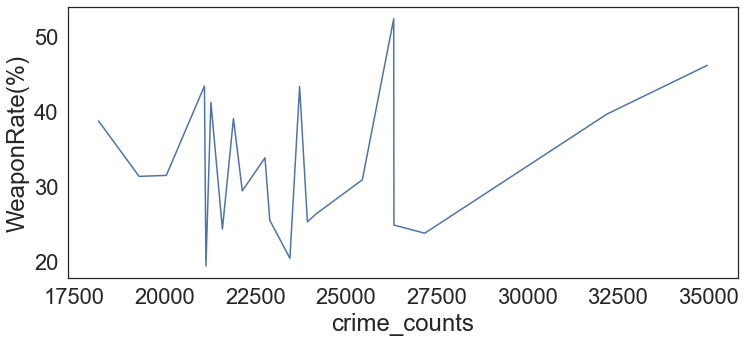

In [52]:
sns.lineplot(data = AreaCrimeWithWeaponRates, x='crime_counts', y='WeaponRate(%)')

Clearly such trend does not exist shown by the graph. One main reason is that crime_counts does not take the area size and population into consider, so it does not reflect the crime rate. However, we can make connection from area to weapon usage rate in crimes by simply looking at its location.

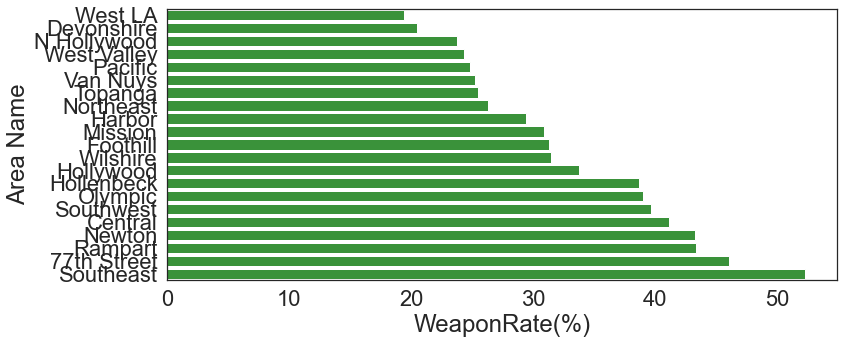

In [53]:
df_sorted = AreaCrimeWithWeaponRates.sort_values('WeaponRate(%)')
plot_weaponRate = sns.barplot(x="WeaponRate(%)", y="Area Name", palette = ['tab:green'], data=df_sorted)
plt.show(plot_weaponRate)

![Alt text](https://www.qsl.net/n6uru/images/lapdcitymap2009.jpg)

From the bar plot sorted by weapon rate and the area map, we can see that high weapon usage rate areas(>35%) are located intensively on the map(labeled 1,2,3,4,12,13,18,20). Nearly all of these areas are located in central or south bureau. We can see clearer how different area location leads to different weapon rate by dividing the data into bureaus.

In [54]:
valley = AreaCrimeWithWeaponRates.iloc[[2, 3, 7, 8, 16, 17, 19]].mean()
west = AreaCrimeWithWeaponRates.iloc[[6, 11, 12, 18, 20]].mean()
central = AreaCrimeWithWeaponRates.iloc[[1, 5, 9, 10, 13]].mean()
south = AreaCrimeWithWeaponRates.iloc[[0, 4, 14, 15]].mean()
valley['Bureau Name'] = "Valley"
west['Bureau Name'] = "West"
central['Bureau Name'] = "Central"
south['Bureau Name'] = "South"

RatesByBureau = pd.concat([valley.to_frame().T,west.to_frame().T,central.to_frame().T,south.to_frame().T])
RatesByBureau['WeaponRate(%)'] = RatesByBureau['counts_with_weapon'].div(RatesByBureau['crime_counts']/100)

RatesByBureau


,crime_counts,counts_with_weapon,WeaponRate(%),Bureau Name
0,23397.857143,6042.714286,25.82593,Valley
0,22430.6,6638.4,29.595285,West
0,21683.8,8311.8,38.331842,Central
0,28910.75,12288.5,42.504951,South


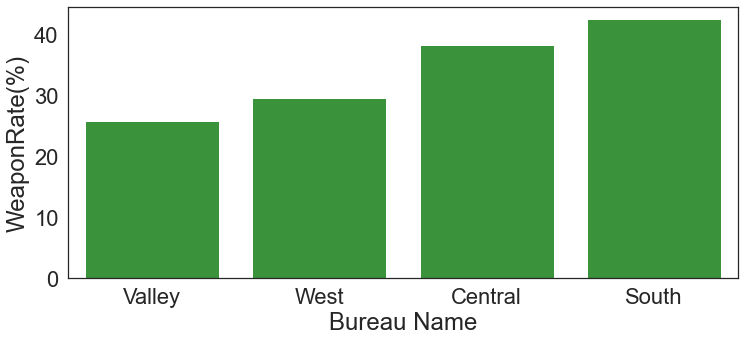

In [55]:
plot_weaponRateByBureau = sns.barplot(x="Bureau Name", y="WeaponRate(%)", palette = ['tab:green'], data=RatesByBureau)
plt.show(plot_weaponRateByBureau)

By taking means of the weapon rates of the different bureaus, we can conclude that areas in central and south part of LA does have higher weapon usage rate in crimes.

![label](https://scpr.brightspotcdn.com/dims4/default/665ca9e/2147483647/strip/true/crop/640x720+0+0/resize/640x720!/quality/90/?url=http%3A%2F%2Fscpr-brightspot.s3.amazonaws.com%2Flegacy%2Fi%2F11f450bd0733b95da5b75565271f4bd8%2F5b2c49c34488b30009279b3f-original.jpg) 

We have further conclusion when we compare that with safety map of Los Angelos, we can match the areas with least safe score with the areas/bureaus we found with highest weapon usage rate in crimes. Therefore, there exists a correlation that with areas being less safe, the crimes happening in the area have higher rate of weapon usage.

#### EDA on Weapon to Crime

In [56]:
weaponToCrime.head(5)

,Weapon Used Code,Weapon Description,Crime Code,Crime Code Description
0,NaN,NaN,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
1,302.0,BLUNT INSTRUMENT,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
2,NaN,NaN,310,BURGLARY
3,NaN,NaN,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)
4,NaN,NaN,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)


In [57]:
num_crime = len(weaponToCrime['Crime Code'].unique())
print(f'Number of crime types is {num_crime}')

Number of crime types is 134


There are 134 different crime types and we want to know how many of them correlates to weapon usage. But first, we need to visualize whether some crime code appear more than the others. So we can decide on whether to plot the count of weapon usage or the percentage of weapon usage.

maximum occurance is 46150, minimal occurance is 1


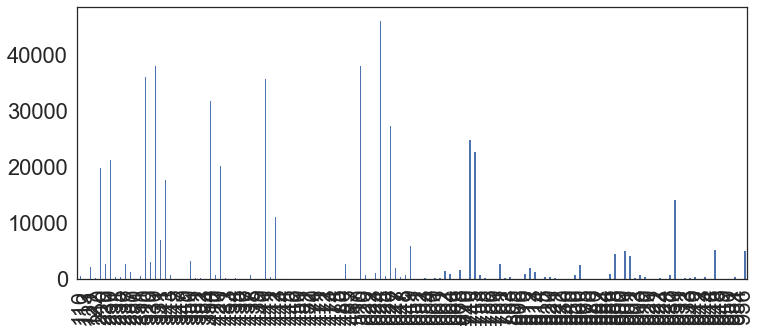

In [58]:
# Plot count of crime codes
weaponToCrime['Crime Code'].value_counts().sort_index().plot(kind="bar")
top_occur = weaponToCrime['Crime Code'].value_counts().max()
min_occur = weaponToCrime['Crime Code'].value_counts().min()
print(f'maximum occurance is {top_occur}, minimal occurance is {min_occur}')

We can see from above that the occurances of crime codes greatly varies, while some of them occur more than 40000 times, some of them occcur only once. Thus, we want to both look at the count and percentage, since uncommon crimes might just occur with weapons by chance since the sample amount is small (to make sure it's not an outlier). We need to further investigate whether the crime type is related to weapons or it's just happened with weapon accidentally.

<AxesSubplot:xlabel='Crime Code'>

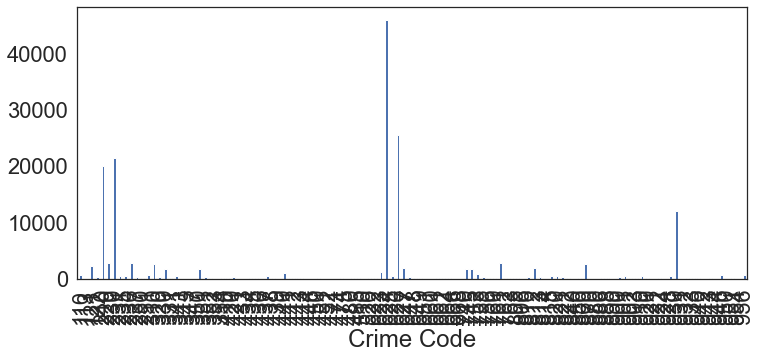

In [59]:
# plot weapon count by crime code
weaponToCrime[weaponToCrime['Weapon Used Code'].notna()].groupby('Crime Code')['Weapon Used Code'].count().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='Crime Code'>

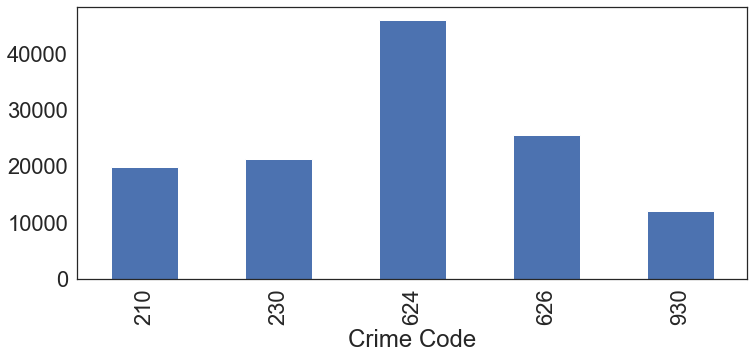

In [60]:
# plot weapon count by crime code
weapon_by_crime = weaponToCrime[weaponToCrime['Weapon Used Code'].notna()].groupby('Crime Code')['Weapon Used Code'].count()
weapon_by_crime[weapon_by_crime > 10000].plot(kind = 'bar')

The above graph shows the crimes that happens with weapons the most, we can see that there are only 5 of them happens more than 10000 times.

In [61]:
weaponToCrime[(weaponToCrime['Crime Code']==210)|
              (weaponToCrime['Crime Code']==230)|
              (weaponToCrime['Crime Code']==624)|
              (weaponToCrime['Crime Code']==626)|
              (weaponToCrime['Crime Code']==930)]['Crime Code Description'].unique()

array(['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY',
       'INTIMATE PARTNER - SIMPLE ASSAULT'], dtype=object)

We can see that while 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' is predictable, but is hard to imagine that crimes like 'INTIMATE PARTNER - SIMPLE ASSAULT' are also likely to be the cause of using weapons.

<AxesSubplot:xlabel='Crime Code'>

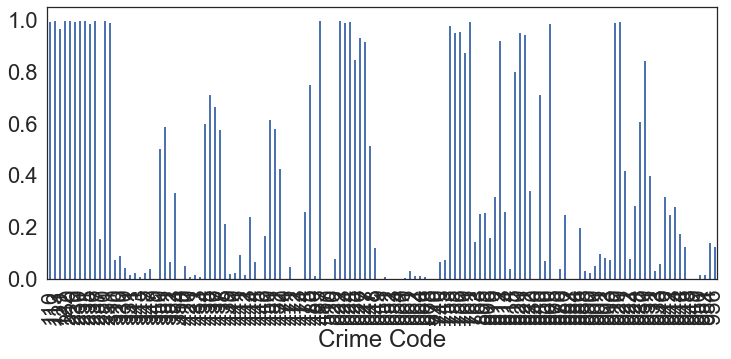

In [62]:
# plot weapon count by crime code in percentage
with_weapons = weaponToCrime[weaponToCrime['Weapon Used Code'].notna()].groupby('Crime Code')['Weapon Used Code'].count()
total = weaponToCrime.groupby('Crime Code')['Weapon Used Code'].apply(lambda x: x.shape[0])
percentage_weapon = (with_weapons/total)
percentage_weapon.plot(kind='bar')

<AxesSubplot:xlabel='Crime Code'>

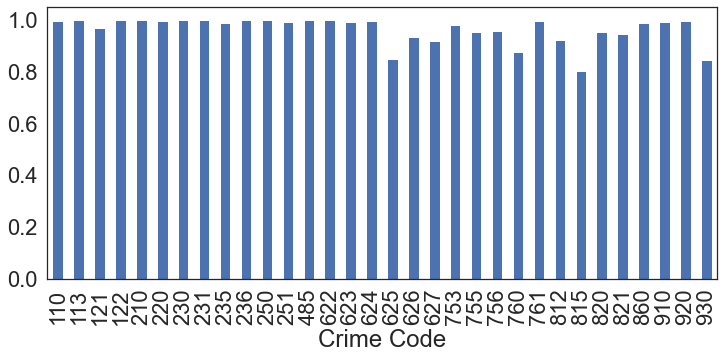

In [63]:
percentage_weapon[percentage_weapon > 0.8].plot(kind = 'bar')

We can again find 210, 230, 624, 626, 930 amongst the top crimes with weapons. Which provides an strong evidence that some of the crime types does strongly suggest that they might be conducted with weapons.